Homework #4: Sarah Harden

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Task #1

In [3]:
url = "https://www4.stat.ncsu.edu/online/datasets/StudentData.txt"

Stu_Data = pd.read_csv(
    url,
    sep=";")

Stu_Data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
Stu_Data[["age", "absences", "G3"]].agg(
    ["mean", "median", "std"]
)


,age,absences,G3
mean,16.696203,5.708861,10.415190
median,17.000000,4.000000,11.000000
std,1.276043,8.003096,4.581443


Part A:

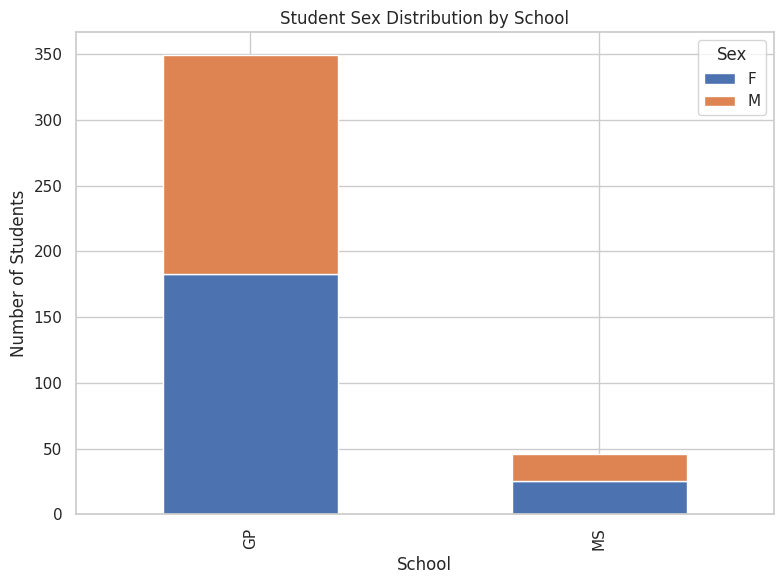

In [6]:
ct = pd.crosstab(Stu_Data["school"], Stu_Data["sex"])

ct.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6)
)

plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Student Sex Distribution by School")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


The stacked bar graph shows that both schools (GP and MS) have a relatively balanced distribution of male and female students, though one sex slightly outnumbers the other in each school. This suggests that differences observed later in academic outcomes are unlikely to be driven simply by extreme gender imbalance between schools.

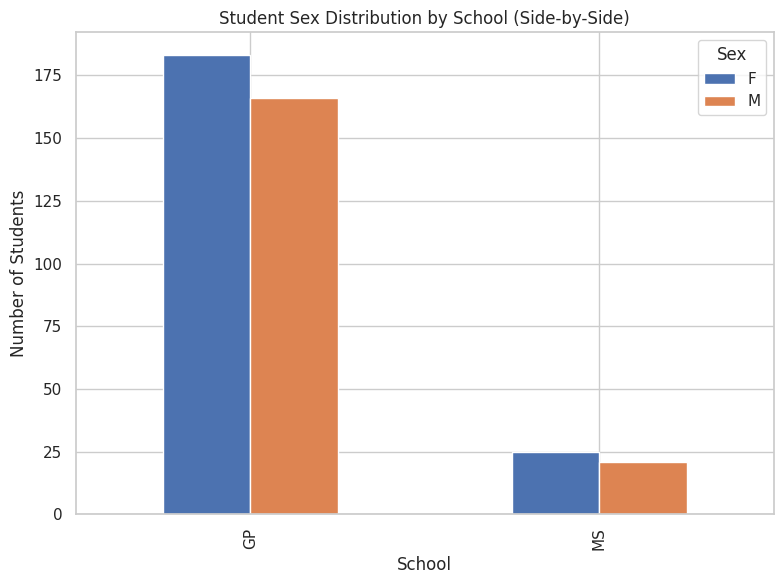

In [7]:
ct.plot(
    kind="bar",
    stacked=False,
    figsize=(8,6)
)

plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Student Sex Distribution by School (Side-by-Side)")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


The side-by-side bar graph makes it easier to directly compare counts of male and female students across schools. While the stacked bar chart emphasizes composition, this plot highlights that GP has a larger overall student population than MS, which is important context when comparing academic performance between schools.

Part B

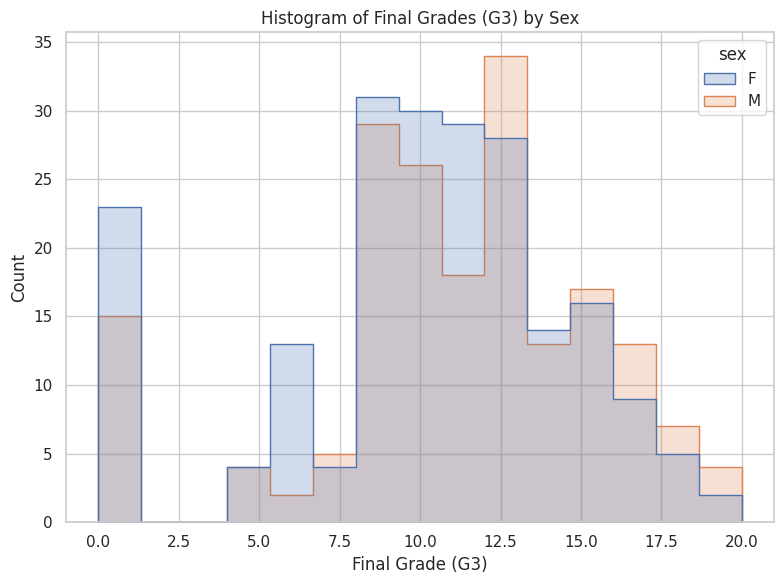

In [8]:
#B1
plt.figure(figsize=(8,6))
sns.histplot(
    data=Stu_Data,
    x="G3",
    hue="sex",
    bins=15,
    kde=False,
    element="step"
)

plt.xlabel("Final Grade (G3)")
plt.ylabel("Count")
plt.title("Histogram of Final Grades (G3) by Sex")
plt.tight_layout()
plt.show()


The histogram shows that final grades (G3) are spread across the full grading range for both sexes, with most students clustered in the middle values. The overlap between groups indicates that while there may be small differences in performance, the overall grade distributions for male and female students are broadly similar.

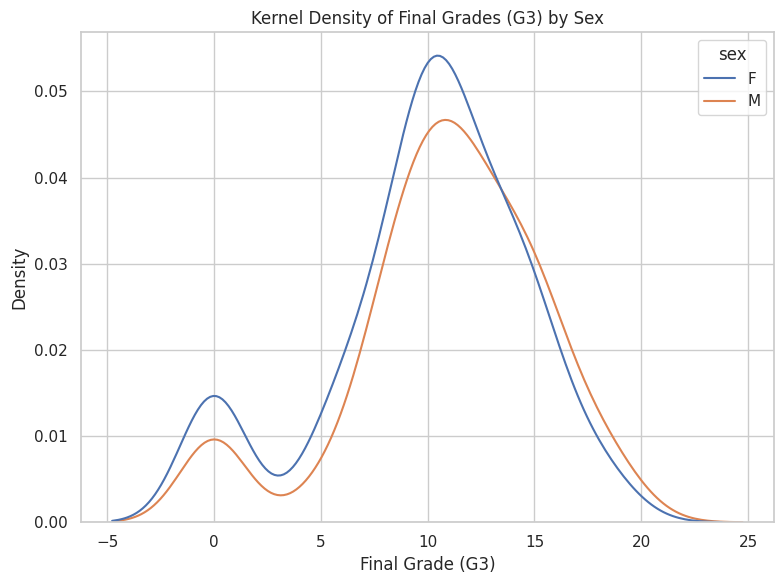

In [9]:
#B2
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=Stu_Data,
    x="G3",
    hue="sex",
    fill=False
)

plt.xlabel("Final Grade (G3)")
plt.ylabel("Density")
plt.title("Kernel Density of Final Grades (G3) by Sex")
plt.tight_layout()
plt.show()


The overlayed kernel density plot reveals subtle differences in the shape of the grade distributions that are less obvious in the histogram. One group shows a slightly higher density at upper grade values, suggesting marginally better overall performance, even though the majority of the distribution overlaps strongly between sexes.

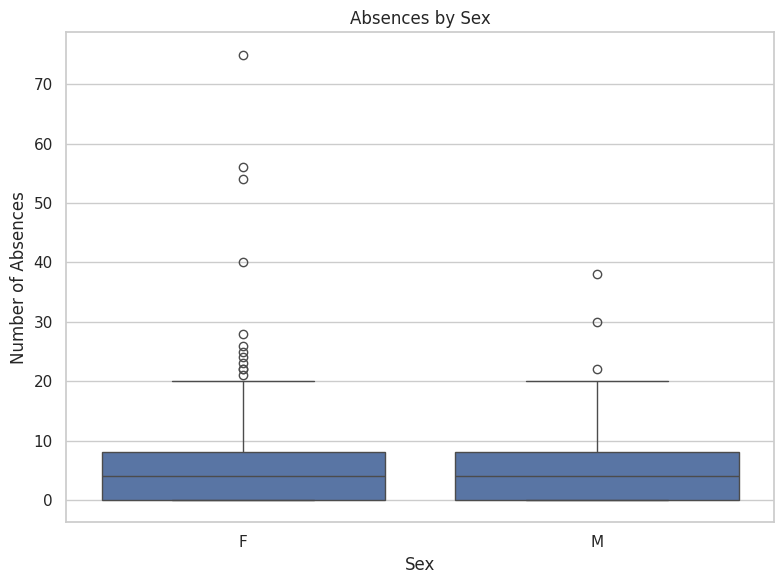

In [10]:
#B3
plt.figure(figsize=(8,6))
sns.boxplot(
    data=Stu_Data,
    x="sex",
    y="absences"
)

plt.xlabel("Sex")
plt.ylabel("Number of Absences")
plt.title("Absences by Sex")
plt.tight_layout()
plt.show()


The boxplot indicates that the median number of absences is similar for both sexes, but there is substantial variability and several high-value outliers. This suggests that while most students have relatively low absence counts, a small number of students—regardless of sex—miss school far more frequently.

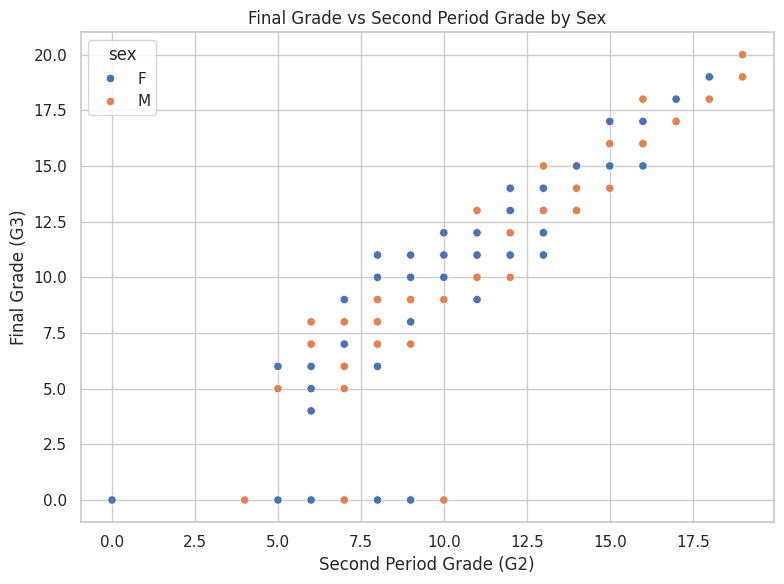

In [11]:
#B4
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=Stu_Data,
    x="G2",
    y="G3",
    hue="sex"
)

plt.xlabel("Second Period Grade (G2)")
plt.ylabel("Final Grade (G3)")
plt.title("Final Grade vs Second Period Grade by Sex")
plt.tight_layout()
plt.show()


This scatterplot shows a strong positive relationship between G2 and G3, indicating that students who perform well earlier in the term tend to maintain strong performance by the final grade. The similar patterns across sexes suggest that prior academic performance is a strong predictor of final outcomes for all students.

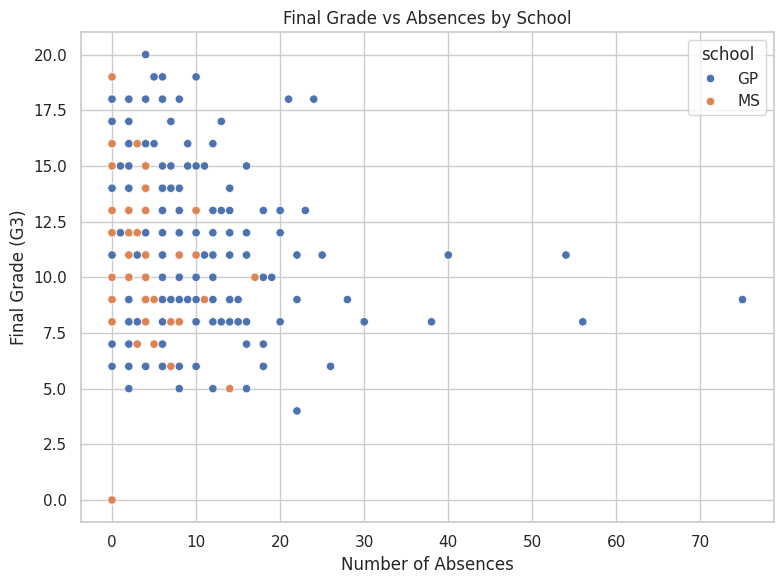

In [12]:
#B5
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=Stu_Data,
    x="absences",
    y="G3",
    hue="school"
)

plt.xlabel("Number of Absences")
plt.ylabel("Final Grade (G3)")
plt.title("Final Grade vs Absences by School")
plt.tight_layout()
plt.show()


The scatterplot suggests a weak negative relationship between absences and final grade, where higher numbers of absences are often associated with lower G3 values. However, there is considerable variability within each school, indicating that absences alone do not fully explain differences in academic performance.

Part II: NFL Data

Task 1: Import Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Callable
import time

sns.set(style="whitegrid")

url = "https://www4.stat.ncsu.edu/online/datasets/scoresFull.csv"
scores = pd.read_csv(url)

scores.head()


,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [ ]:
scores["totalYards"] = (
    scores["AtotalYds"] + scores["HtotalYds"]
)

In [14]:
cat_vars = [
    "homeTeam", "awayTeam", "day", "stadium",
    "startTime", "toss", "roof", "surface"
]

for var in cat_vars:
    scores[var] = scores[var].astype("category")


Task 2: Summarize the Data

In [25]:
#Filter for regular season
scores["week"] = pd.to_numeric(scores["week"], errors="coerce")
reg_season = scores.loc[scores["week"].between(1, 17)].copy()


In [26]:
#Scenario 1: Final score/Total Yards
season_week_summary = (
    reg_season
    .groupby(["season", "week"])
    .agg(
        avg_home_score=("HFinal", "mean"),
        avg_away_score=("AFinal", "mean"),
        avg_total_yards=("totalYards", "mean")
    )
    .reset_index()
)

season_week_summary.head()


,season,week,avg_home_score,avg_away_score,avg_total_yards
0,2002,1.0,26.125000,23.125000,658.625000
1,2002,2.0,18.187500,22.687500,647.750000
2,2002,3.0,24.428571,19.571429,621.785714
3,2002,4.0,28.285714,18.928571,690.928571
4,2002,5.0,23.214286,24.000000,721.142857


In [28]:
#Scenario 2: Final score by week
season_summary = (
    reg_season
    .groupby("season")
    .agg(
        avg_home_score=("HFinal", "mean"),
        avg_away_score=("AFinal", "mean"),
    )
    .reset_index()
)

season_summary.head()


,season,avg_home_score,avg_away_score
0,2002,22.796875,20.550781
1,2003,22.609375,19.054688
2,2004,22.738281,20.230469
3,2005,22.441406,18.792969
4,2006,21.082031,20.234375


In [29]:
#Scenario 3: Final Home Score/Total Yards of Play
week_summary = (
    reg_season
    .groupby("week")
    .agg(
        avg_home_score=("HFinal", "mean"),
        avg_total_yards=("totalYards", "mean")
    )
    .reset_index()
)

week_summary.head()


,week,avg_home_score,avg_total_yards
0,1.0,22.139423,651.625000
1,2.0,22.840580,665.975845
2,3.0,22.646465,674.929293
3,4.0,24.092391,680.733696
4,5.0,24.324176,672.362637


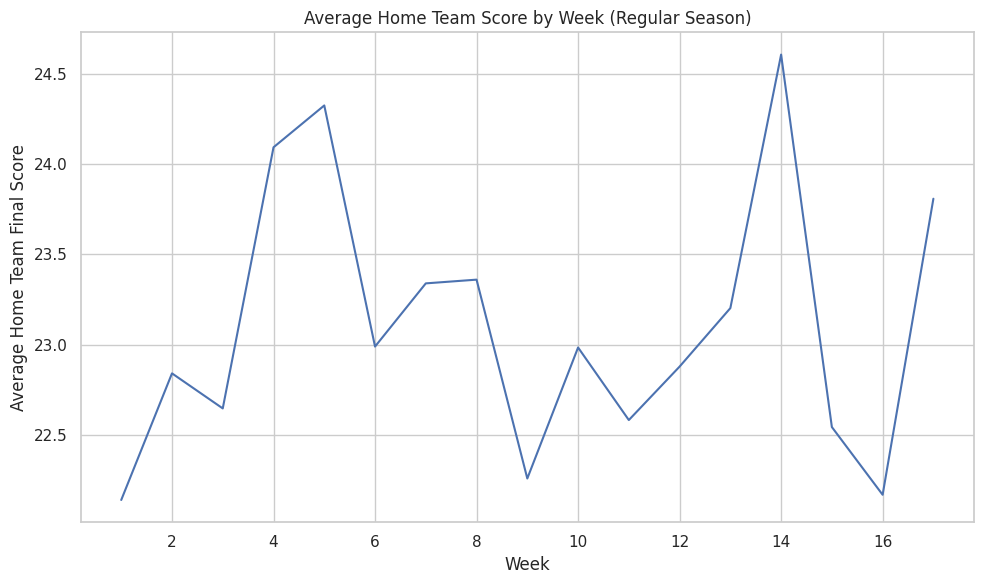

In [30]:
#Plot Scenario 1
plt.figure(figsize=(10,6))
sns.lineplot(data=week_summary, x="week", y="avg_home_score")

plt.xlabel("Week")
plt.ylabel("Average Home Team Final Score")
plt.title("Average Home Team Score by Week (Regular Season)")
plt.tight_layout()
plt.show()


Average home team scoring increases slightly as the season progresses, suggesting teams may become more offensively efficient later in the season or that defensive fatigue accumulates over time.

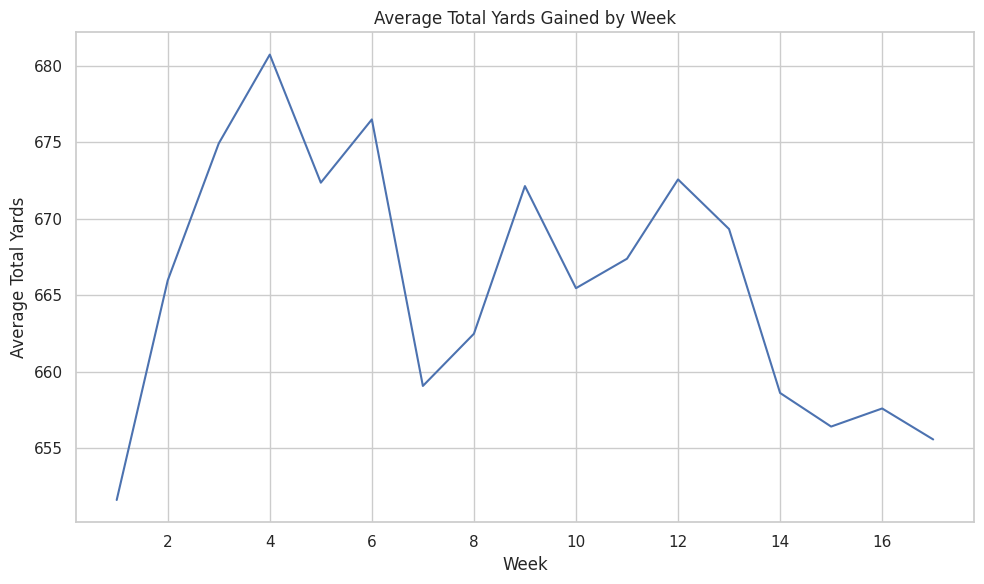

In [31]:
#Plot Average Yards Gained by Week
plt.figure(figsize=(10,6))
sns.lineplot(data=week_summary, x="week", y="avg_total_yards")

plt.xlabel("Week")
plt.ylabel("Average Total Yards")
plt.title("Average Total Yards Gained by Week")
plt.tight_layout()
plt.show()


Total yards per game remain relatively stable across weeks, indicating that while scoring fluctuates, overall offensive production does not vary dramatically throughout the regular season.

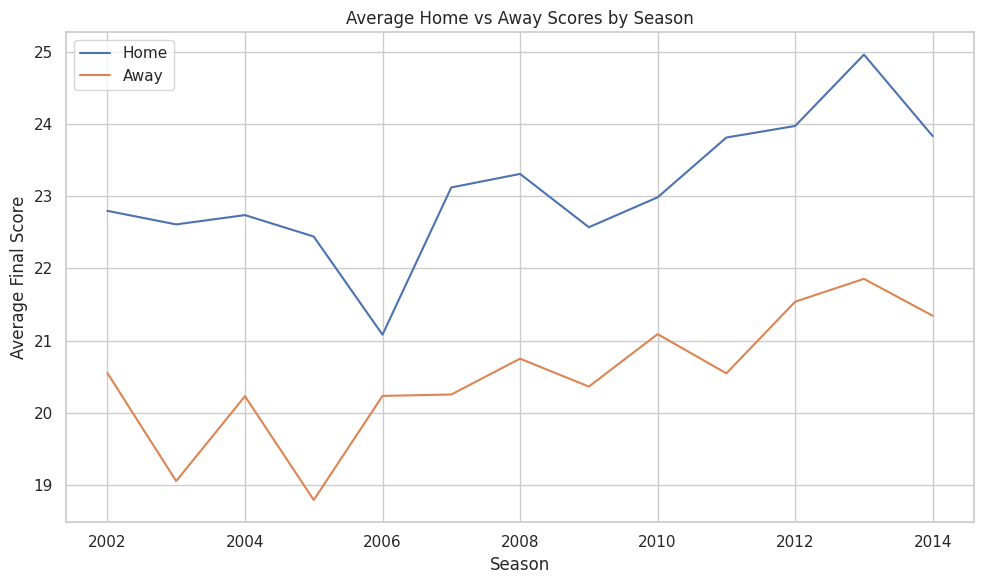

In [32]:
#Plot Avg Home vs Away Scores by year on year season
plt.figure(figsize=(10,6))
sns.lineplot(data=season_summary, x="season", y="avg_home_score", label="Home")
sns.lineplot(data=season_summary, x="season", y="avg_away_score", label="Away")

plt.xlabel("Season")
plt.ylabel("Average Final Score")
plt.title("Average Home vs Away Scores by Season")
plt.legend()
plt.tight_layout()
plt.show()


Home teams consistently score more than away teams across seasons, reinforcing the presence of a home-field advantage. The gap remains relatively stable, suggesting this advantage is persistent rather than season-specific.

In [33]:
#Adding the timing function for code run
def timeit(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Runtime: {end - start:.4f} seconds")
        return result
    return wrapper


In [34]:
@timeit
def plot_stat_over_time(
    df: pd.DataFrame,
    group_var: str,
    value_var: str,
    stat: Callable = "mean"
):
    summary = (
        df.groupby(group_var)[value_var]
        .agg(stat)
        .reset_index()
    )

    plt.figure(figsize=(10,6))
    sns.lineplot(data=summary, x=group_var, y=value_var)

    plt.xlabel(group_var.capitalize())
    plt.ylabel(f"{stat.capitalize()} of {value_var}")
    plt.title(f"{stat.capitalize()} {value_var} by {group_var}")
    plt.tight_layout()
    plt.show()


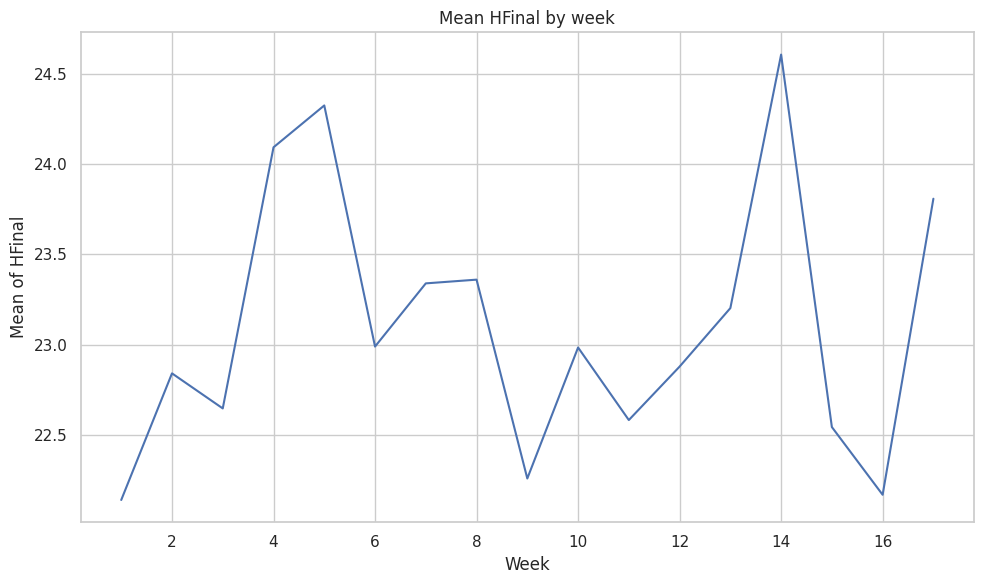

Runtime: 0.2769 seconds


In [35]:
#Plot 1, home final score mean across weeks
plot_stat_over_time(reg_season, "week", "HFinal", "mean")


Scoring trends fluctuate week to week, but there is no sharp decline late in the season, suggesting offensive consistency across the regular season.

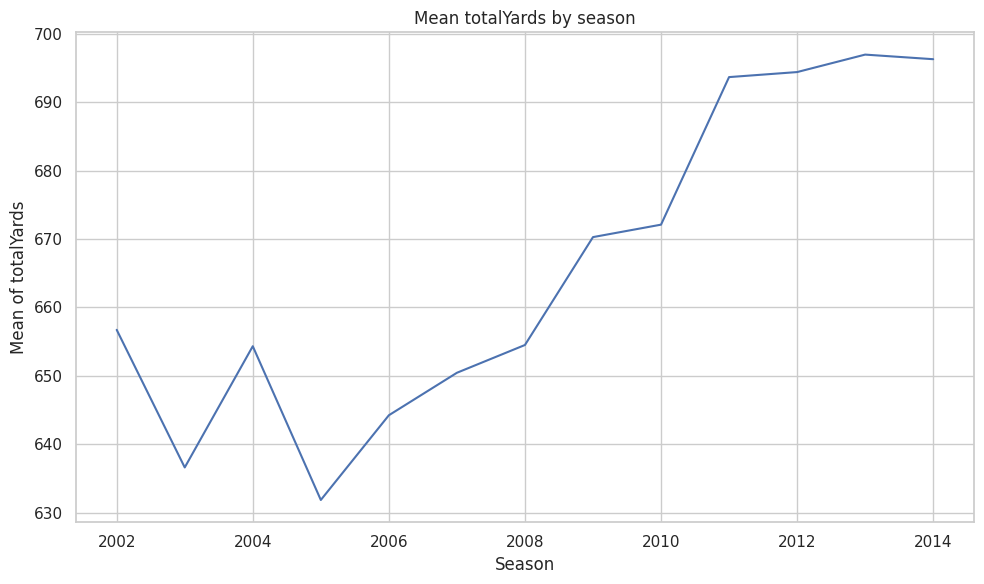

Runtime: 0.2153 seconds


In [36]:
#Plot 2: Season over season total yards mean
plot_stat_over_time(reg_season, "season", "totalYards", "mean")


Total yards vary modestly by season, which could reflect rule changes, offensive strategies, or league-wide shifts in play style. I aggregated outside of the regular season because I thought it was interesting we are seeing such an increase in total yards over the last six years in the NFL. Style of play changes?

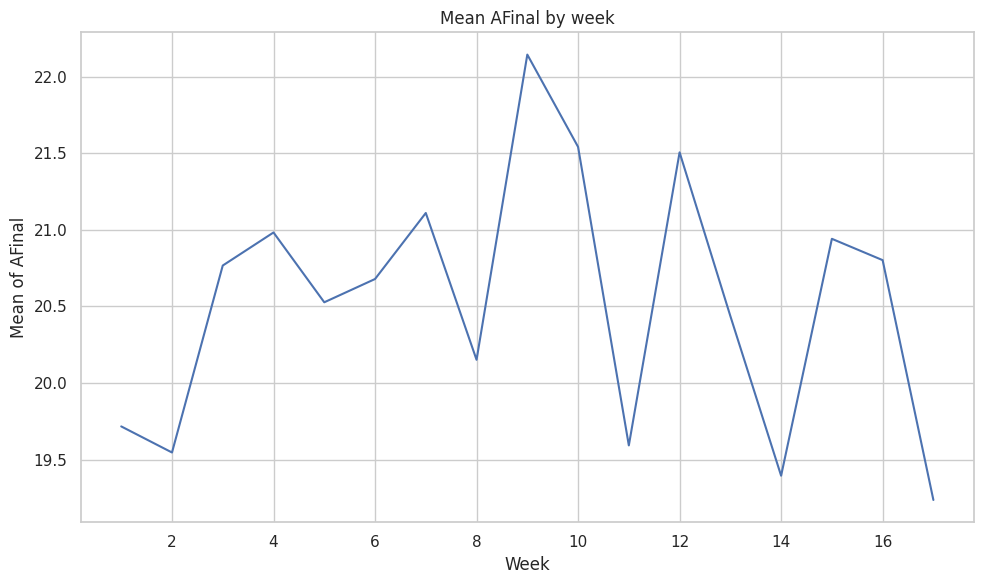

Runtime: 0.3077 seconds


In [38]:
#Plot 3: Week Away Team final Score means
plot_stat_over_time(reg_season, "week", "AFinal", "mean")


Away team scores tend to decrease slightly as the season progresses, possibly indicating road/travel fatigue or more conservative play later in the season for the playoffs.